# Example of BzFit module with MCMC

Note: This figure was made for the Encyclopedia of Astrophysics (for the magnetic star chapter) by V. Petit

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import specpolFlow as pol

plt.rcParams.update({'font.size':13})

In [5]:
import BzFit_module as m 
import pandas as pd
import scipy.optimize as opt
import emcee
import corner

In [25]:
# Make some fake data
n = 20
sigma = 0.2
#Bp = 10
#beta = 53 * np.pi/180
#u=0.5
#i = 60 * np.pi/180
#phase = np.linspace(0,1,n)+np.random.uniform(0,1,n)*0.005
#Bz = Bp/20*(15+u)/(3-u)*(np.cos(beta)*np.cos(i)+np.sin(beta)*np.sin(i)*np.cos(phase*2*np.pi))
#sigma = 0.2
#Bz = Bz + np.random.normal(0,sigma,n)

#np.save('phase',phase)
#np.save('Bz',Bz)
#phase = np.load('phase.npy')
#Bz = np.load('Bz.npy')

#data = m.data(phase, Bz, np.ones(n)*sigma)


#fig, ax = plt.subplots(1,1)
#ax.errorbar(data.foldphase(1,0), data.val, data.val_err, ls='', fmt='o', c='k')


In [26]:
phase = np.load('phase.npy')
Bz = np.load('Bz.npy')
data = m.data(phase, Bz, np.ones(n)*sigma)

P = 1.0
#sampler, pos = m.set_mcmc(data, 1.0, 0.0, filename='MCMC.h5')
#sampler.run_mcmc(pos, 2000, progress=True)

100%|██████████| 2000/2000 [00:05<00:00, 382.12it/s]


State([[ 2.10287971  0.8516912  -0.07983803]
 [ 2.2947496   0.85556567 -0.02888634]
 [ 2.07459523  0.83515244 -0.09543716]
 [ 2.15069047  0.83501784 -0.04123307]
 [ 2.14842292  0.80106883 -0.0435229 ]
 [ 2.12455068  0.86863908 -0.06145704]
 [ 2.23045144  0.81578713 -0.01898091]
 [ 2.13642553  0.80140975 -0.06216037]
 [ 2.18194426  0.8747685  -0.04266168]
 [ 2.10566112  0.73109927 -0.11046474]
 [ 2.17277201  0.75573688 -0.02139717]
 [ 2.016197    0.83619957 -0.04207437]
 [ 2.05167336  0.80779351 -0.06774475]
 [ 2.10973652  0.82093996 -0.05689024]
 [ 2.17303168  0.86851024 -0.08409677]
 [ 2.13749578  0.89233849 -0.09152857]
 [ 2.22842025  0.75341763 -0.04119359]
 [ 2.10334537  0.79768925 -0.10582615]
 [ 2.22983424  0.8568439  -0.08376346]
 [ 2.22197508  0.86053377 -0.04015855]
 [ 2.20963716  0.8479138  -0.05409958]
 [ 2.11018176  0.90992657 -0.06486499]
 [ 2.21532217  0.83249885 -0.02816918]
 [ 2.18921566  0.74153487 -0.02071052]
 [ 2.18447947  0.7429027  -0.06578701]
 [ 2.2711157   0.83

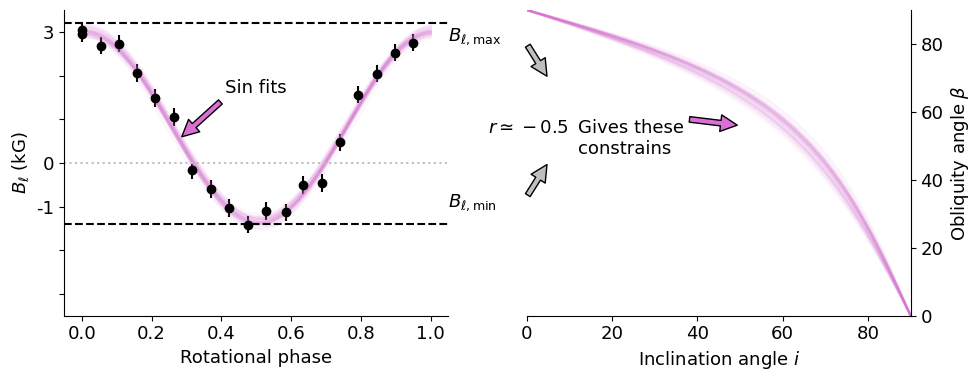

In [39]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].errorbar(data.foldphase(1,0), data.val, data.val_err,
            ls='', fmt='o', c='k')

phi_arr = np.linspace(0,1,500) # array of phases to use to plot the model
incl = np.linspace(0,np.pi/2,100) # array of inclinations to make curves

s = emcee.backends.HDFBackend('MCMC.h5')
s_flat = s.get_chain(discard=250, flat=True)
inds = np.random.randint(len(s_flat), size=50)
for ind in inds:
    theta = s_flat[ind]
    model = m.cos_model(*theta)
    #print(model.r)
    ax[0].plot(phi_arr, model.get_model(phi_arr*2*np.pi), color='orchid',alpha=0.05)
    ax[1].plot(incl*180/np.pi, model.get_beta(incl)*180/np.pi, color='orchid',alpha=0.05)


ax[0].axhline(y=0,ls='dotted', c='0.75')
ax[0].set_ylim(-3.5,3.5)
ax[0].set_xlabel('Rotational phase')
ax[0].set_ylabel(r'$B_\ell$ (kG)')

ax[1].set_xlim(0,90)
ax[1].set_ylim(0,90)
ax[1].set_xlabel(r'Inclination angle $i$')
ax[1].set_ylabel(r'Obliquity angle $\beta$')
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")

ax[0].spines[['right', 'top']].set_visible(False)
ax[1].spines[['left', 'top']].set_visible(False)

ax[0].text(1.05,-1,'$B_{\ell,\mathrm{min}}$')
ax[0].text(1.05,2.8,'$B_{\ell,\mathrm{max}}$')

ax[0].set_yticks(np.arange(-3,3.1,1))
ax[0].set_yticklabels(['','','-1','0','','','3'])

ax[0].annotate('Sin fits', [0.28,0.55], xytext=[0.5,1.5], 
               xycoords='data',
               arrowprops=dict(facecolor='orchid', shrink=0.05),
               horizontalalignment='center', verticalalignment='bottom')

ax[0].axhline(y=-1.4, ls='--', c='k')
ax[0].axhline(y=3.2, ls='--', c='k')

plt.tight_layout()

ax[1].annotate('', [5,45], xytext=[0,35], 
               xycoords='data',
               arrowprops=dict(facecolor='0.75', shrink=0.05),
               horizontalalignment='center', verticalalignment='bottom')
ax[1].annotate('', [5,70], xytext=[0,80], 
               xycoords='data',
               arrowprops=dict(facecolor='0.75', shrink=0.05),
               horizontalalignment='center', verticalalignment='top')

ax[1].text(10,58,r'$r\simeq-0.5$',ha='right', va='top')

ax[1].annotate('Gives these\nconstrains', [50,56], xytext=[12,58], 
               xycoords='data',
               arrowprops=dict(facecolor='orchid', shrink=0.05),
               horizontalalignment='left', verticalalignment='top')


fig.savefig('preston.pdf')